In [2]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

# Doing Sentimental Analysis using NLTK 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Reading Data

In [4]:
file=pd.read_csv('Refined.csv')
pd.set_option('display.max_colwidth',)


C:\Users\Parth\AppData\Local\Temp\ipykernel_16864\234424308.py:1: DtypeWarning: Columns (1,2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file=pd.read_csv('Refined.csv')


## Data Pre Processing : Converting Data into their respective types

In [5]:
file['Time'] = pd.to_datetime(file['Time'], unit='s')

In [6]:
file.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,2008-08-18,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,2012-10-21,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [7]:
file2=file[0:9998]

## THE FILE WE WILL WORK ON

In [8]:
file2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,2008-08-18,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,2012-10-21,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
...,...,...,...,...,...,...,...,...,...,...
9993,9994.0,B000P41A28,AV3IMDC3C0F8,Miss K,1.0,1.0,5.0,2008-02-06,It's about time!,"As far as I can tell, this is the only organic ""ready to feed"" formula on the US market (Earth's Best only comes in powder form). It's about time!!!! It's CHEAPER on Amazon than from the Similac online store."
9994,9995.0,B000P41A28,A350OL4V8DV5YK,Helen Avramenko,3.0,4.0,5.0,2009-11-30,great product,"I switched from Similac Advanced to Organic when my daughter was 1 month old. She is almost 5 months now, no problems at all! She loves it!"
9995,9996.0,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10.0,15.0,1.0,2008-03-03,constipation,we switched from the advance similac to the organic product thinking it would be better as we prefer organic foods ourselves. it was a disaster with our 2 month old baby getting constipated and progressively worsening her intake till she fell drastically below her calorie intake. we discontinued the product within five days and switched back to the previous similac and she is fine now. her feeding and calorie intake is back to normal
9996,9997.0,B000P41A28,A5VVRGL8JA7R,Adam,2.0,3.0,5.0,2011-05-26,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula constipated our daughter. However, by alternating every other feeding with regular (non-organic) formula the problem was resolved. I'm a believer that some organic is better than no organic. We've used this method for 2 months and our daughter is full, happy, and growing well.<br /><br />I would recommend this if you are looking for an organic formula with milk as the first ingredient (as opposed to rice in some of the others)."


In [9]:
file2.shape

(9998, 10)

## QUICK EDA

In [10]:
file2.Score

0       5.0
1       1.0
2       4.0
3       2.0
4       5.0
       ... 
9993    5.0
9994    5.0
9995    1.0
9996    5.0
9997    5.0
Name: Score, Length: 9998, dtype: float64

## Doing Value Counts on Score Column :to get frequency of each score

In [11]:
file2.Score.value_counts()

Score
5.0    6182
4.0    1432
1.0     932
3.0     862
2.0     590
Name: count, dtype: int64

## Sorting On the basis of Index

In [12]:
file2.Score.value_counts().sort_index()

Score
1.0     932
2.0     590
3.0     862
4.0    1432
5.0    6182
Name: count, dtype: int64

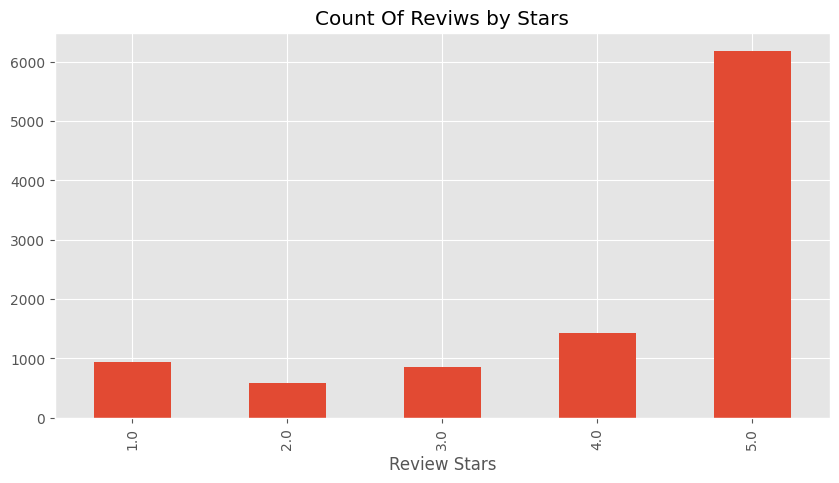

In [13]:
ax= file2['Score'].value_counts().sort_index().plot(kind='bar',title='Count Of Reviws by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK Stuff Starts

## Taking Example Review 

In [14]:
example = file2['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [15]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

## Lets Run Part Of Speech Tagging for each token

In [16]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

## Part Of Speech Token List

In [17]:
pos_dict = {
    'CC': 'Conjunction, coordinating',
    'CD': 'Digit, cardinal',
    'DT': 'Determiner',
    'EX': 'Existential',
    'FW': 'Foreign word',
    'IN': 'Preposition or conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List marker',
    'MD': 'Modal',
    'NN': 'Noun, singular',
    'NNS': 'Noun, plural',
    'NNP': 'Noun, proper singular',
    'NNPS': 'Noun, proper plural',
    'PDT': 'Predeterminer',
    'WRB': 'Adverb, interrogative',
    'WP$': 'Wh-pronoun, possessive',
    'WP': 'Wh-pronoun',
    'WDT': 'Wh-determiner',
    'VBZ': 'Verb, 3rd person singular present',
    'VBP': 'Verb, non-3rd person singular present',
    'VBN': 'Verb, past participle',
    'VBG': 'Verb, gerund or present participle',
    'VBD': 'Verb, past tense',
    'VB': 'Verb, base form',
    'UH': 'Interjection',
    'TO': 'To',
    'RP': 'Particle',
    'RBS': 'Adverb, superlative',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'PRP': 'Pronoun, personal',
    'PRP$': 'Pronoun, possessive',
}


# Create a DataFrame from the part-of-speech tag dictionary
l = pd.DataFrame.from_dict(pos_dict, orient='index', columns=['Description'])

# Display the DataFrame
l


,Description
CC,"Conjunction, coordinating"
CD,"Digit, cardinal"
DT,Determiner
EX,Existential
FW,Foreign word
IN,Preposition or conjunction
JJ,Adjective
JJR,"Adjective, comparative"
JJS,"Adjective, superlative"
LS,List marker


In [18]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [19]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Doing Sentimental Analysis using VADER

## Valence Aware Dictionary and sEntiment Reasoner - (Bag of Words) approach

### Takes all the words from the sentence and it has a value of positive/negative /neutral for each of those words and it combines up and does a math equation and integrating values it will tell how positive/negative/neutral a statement is based on those words,This approach does not account for relationship between words but works as a good start

### Stop Words are removed.

## Stop words are the words who don't contribute in positive and negative feeling , just used to structure the sentence.

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #THIS IS JUST A PROGRESS BAR TRACKER

## Making Sentiment Analyzer Object


In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

## Compound is aggregate of negative ,neutral and positive and it ranges from -1 to +1

### While neg , neu , pos ranges from 0 to 1

In [23]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [24]:
example = file2['Text'][50]
example
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

# RUN THE POLARITY SCORE ON THE ENTIRE DATASET

In [33]:
res={}
for i,row in file2.iterrows():
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    

In [34]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'}) 
vaders=vaders.merge(file2,how='left')

Exception ignored in: <function tqdm.__del__ at 0x000001FFFC3DC040>
Traceback (most recent call last):
  File "C:\Users\Parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\Parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


## Now we have sentiment score and metadata

In [35]:
vaders.head(10)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2.0,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3.0,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,2008-08-18,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4.0,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5.0,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,2012-10-21,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,6.0,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,2012-07-12,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat."
6,7.0,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0.0,0.0,5.0,2012-06-20,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!"
7,8.0,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0.0,0.0,5.0,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,9.0,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,10.0,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,2012-10-26,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


## Plot Vader Results compounds w.r.t Star Reviews

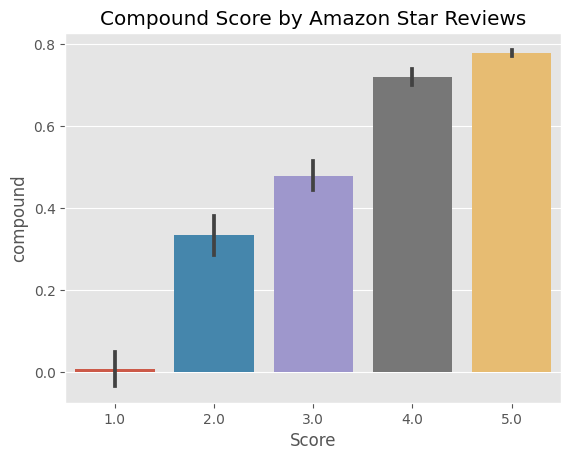

In [36]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax=ax.set_title('Compound Score by Amazon Star Reviews')

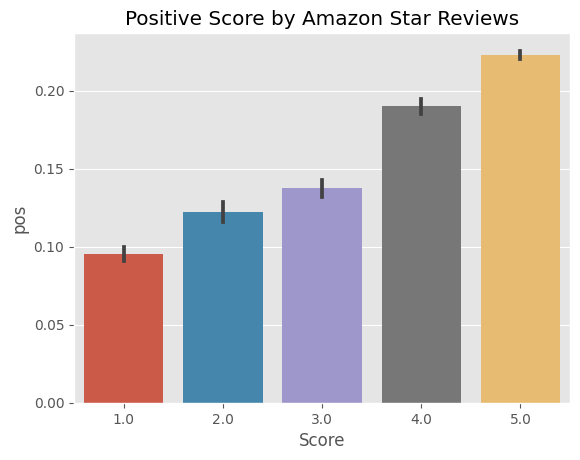

In [37]:
ax=sns.barplot(data=vaders,x='Score',y='pos')
ax=ax.set_title('Positive Score by Amazon Star Reviews')

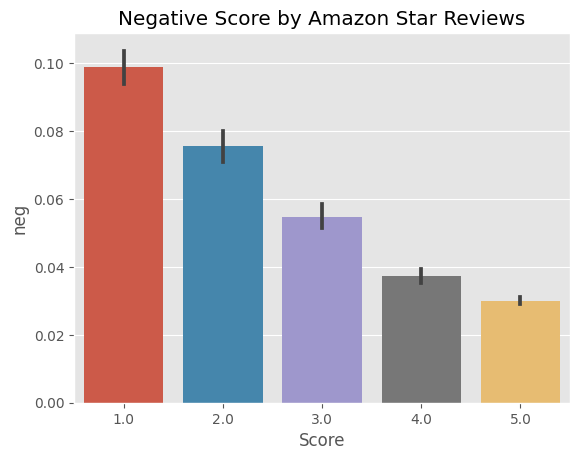

In [38]:
ax=sns.barplot(data=vaders,x='Score',y='neg')
ax=ax.set_title('Negative Score by Amazon Star Reviews')

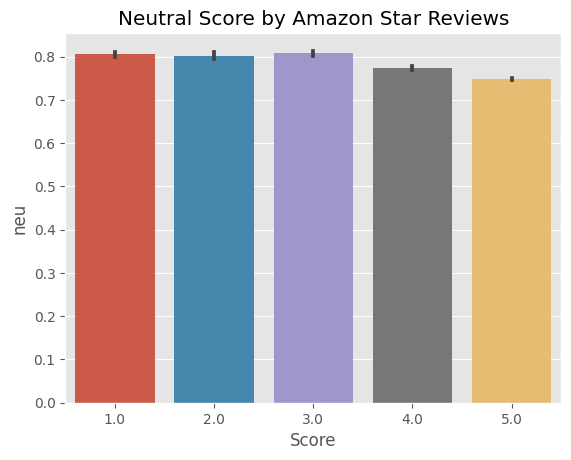

In [39]:
ax=sns.barplot(data=vaders,x='Score',y='neu')
ax=ax.set_title('Neutral Score by Amazon Star Reviews')

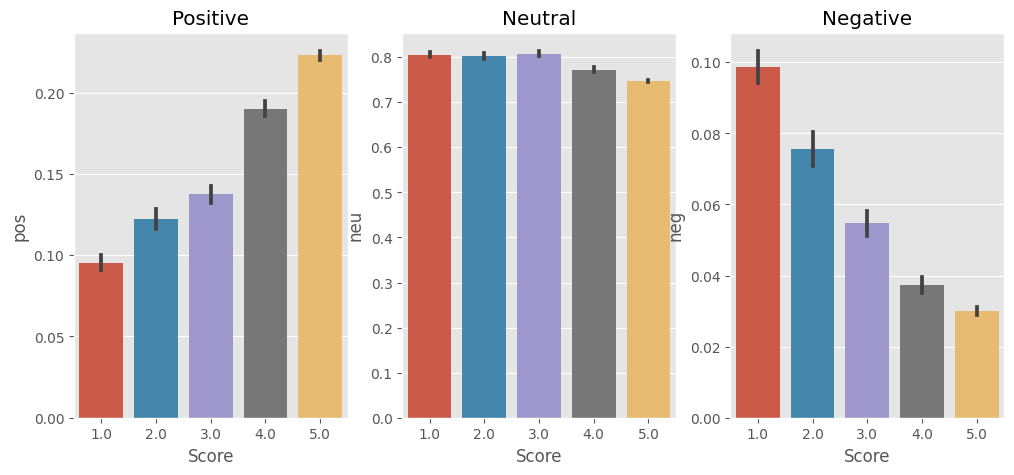

In [40]:
fig, axs = plt.subplots (1, 3, figsize=(12, 5))
sns.barplot (data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot (data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot (data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs [2].set_title('Negative')
plt.show()

### This just confirms what we would hope to see and shows that vader is valuable in having this connection between the score of the text and sentiment score and that it does relate to the actual rating review of the reviewers 

### our previous model just looked at each word in the sentence or in the review,and scored each word individually

### we'll see a sentence that could have negative words actually could be sarcastic or related to other words in which way it makes it a positive

### DRAWBACK OF VADER : vader model wouldn't pick up on that sort of relationship between words